<a href="https://colab.research.google.com/github/youngmoo/ECES-435/blob/main/Class1-2-complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Class 1.2: Announcements**

* Lab 1 available in GitHub after class
  * Due Monday, Sept. 26 before the start of class.
* TA office hours (this week only)
  * Thursday 10am-12pm
  * None on Friday
  * Monday 10am-12pm
  * We'll also try to answer any questions on Discord.
* Also watch [Video No. 3 on the Short-Time Fourier Transform](https://youtu.be/ua2Fn1vkVqY) for Monday's class.



# Google Drive Setup

## *From last class:* How to connect to Google Drive

For this class we use a *shared* Google Drive folder to load and save sound files.

*If you haven't already linked our class folder at the top level of your Google Drive:*

1.   Open the link to [this Google Drive folder](https://drive.google.com/drive/folders/1eL0DgtfN9sitV_1V7nwexzxaalXoWM-V?usp=sharing).
2.   Within Google Drive:
  * For the shared folder (`eces-435-work`) select "Add shortcut to Drive" and add it to your top-level directory, `My Drive`.
  * (This is so we can all use the same directory path for loading and saving files.)


## From last class: Add the shared Google Drive folder to Colab
Next, we mount the Google Drive folder you just added within colab. Run the next code block, which will:

*   Ask  you for permission to access your Google Drive.
*   Once you give permission, your Google Drive will be available at:
  * `/content/drive/MyDrive/`

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


You should now see `drive` lised under your files (folder icon in the left toolbar).
* *If you don't see it, let the instructor know.*

Once your Google Drive is hooked up, enter your Drexel username in the code below:
  * We use this to keep your filenames unique.

In [2]:
# ENTER YOUR USERNAME
username = 'xyz123'

# Define a variable that's the directory path to our directory for today:
path = '/content/drive/MyDrive/eces435-work/class1.2/'

# Python setup

Start by importing the modules we introduced last class.

In [3]:
import numpy as np                # Load the NumPy module, using the abbreviation 'np'.
import matplotlib.pyplot as plt   # Load the Matplotlib module, abbreviated as 'plt'


# Let's make some noise(s)
Run the next cell to set up some initial parameters:

*   Sampling rate: $f_s = 44100$ Hz
*   Initial frequency of sinusoid: $f = 440$ Hz (the musical note `A4`)
*   Duration of sound: 1.0 seconds

Create a new vector $t$, which is the time of each sample of our sound signal.


In [4]:
f = 440                             # Frequency (in Hz)
A = 1.0                             # Amplitude of your sinusoid (try varying this between 0 and 1.0)
duration = 1.0                      # Duration of sound (in seconds)
f_s = 44100                         # Sampling rate (in Hz)
t = np.arange(duration * f_s) / f_s # Vector of time samples

## Create a sine wave
Let's call it $s$. Use the parameters above.

In [5]:
# Create a sine wave using the parameters above

s = A * np.sin(2 * np.pi * f * t)

## Using just part of a signal array
In NumPy, you access a range of elements in an array using brackets, colons, and commas. Each line below shows a different way of accessing values of the array.

* Colab will only show the last output of the block. If we want to display multiple results, use `print` statements.

In [6]:
print( t[0:4] )
print( t[:4] )              
print( t[1000:1004] )
print( t[ [1000, 1003] ])
print( t[-1] )              # What does this one do?

[0.00000000e+00 2.26757370e-05 4.53514739e-05 6.80272109e-05]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 6.80272109e-05]
[0.02267574 0.02269841 0.02272109 0.02274376]
[0.02267574 0.02274376]
0.9999773242630385


## Plot *only* the first 100 milliseconds

The code below will plot the full duration of the signal. Change it to plot just the first 0.1 seconds.

In [7]:
fig1 = plt.figure(figsize = (12, 4))   # Set the size of your figure (in "inches")

# Change this to plot just the first 100 milliseconds (0.1 seconds) of your signal

plt.plot(t[:4410], s[:4410])

#plt.plot(t, s)       # Alternate solution
#plt.xlim(0,0.1)

plt.xlabel("Time (sec)")

# Also add a label for the y-axis
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

## Vary the style of the plot
* Font, font size
* [Linestyles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html)
* [Colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
* Line width

### *Just for fun:* List the available fonts

In [8]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    #return "<p>{font}: <span style='font-family:{font}; font-size: 20px;'>{font}</p>".format(font=fontname)
    return "<p>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])
HTML("<div style='column-count: 2;'>{}</div>".format(code))

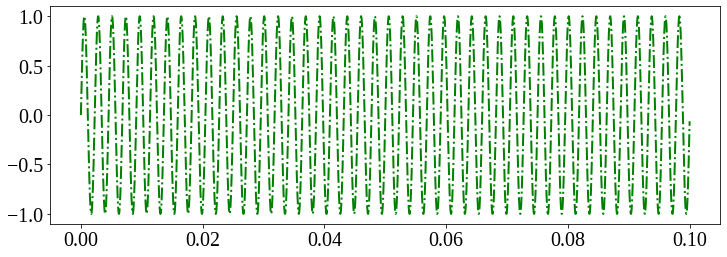

In [9]:
# Some linestyles to try: '--', '-.', ':', '.', 'x'

fig2 = plt.figure(figsize=(12,4))

plt.rc('font', size=20)
plt.rc('font', family='Liberation Serif') # Nicer font

# Change this to still plot just the first 100 milliseconds
plt.plot(t[:4410], s[:4410], '-.', color='green', linewidth=2)

## Save your figure to our class directory on Google Drive
* Note how we combine the `path` and your `username` to create the overall filepath.

In [10]:
filename = path + username + '-sine.png'
print(filename)

fig2.savefig(filename)

/content/drive/MyDrive/eces435-work/class1.2/xyz123-sine.png


## Can you hear me...?
[But wouldn't it be nice](https://youtu.be/dmcNbsLCpBQ) to be able to listen to the sine wave you just created? The Interactive Python (IPython) module `display` makes this really easy.
* After we import the module as `ipd` we can output any signal as an audio file to listen to!
* It's always important to provide both your signal and the sampling rate (`rate=`).

In [11]:
import IPython.display as ipd

ipd.Audio(s, rate=f_s)

# *Pause here while everyone is generating and saving their files.*

# Let's make some music

Now, let's use a sampling rate of
* $f_s$ = 22050 $Hz$
* Duration of sound: 0.5 seconds

Start with an array of time samples $t$. 
* Use NumPy's `arange` (rather than `linspace`... you'll see why shortly):

In [12]:
fs22 = 22050
dur = 0.5

# Create an array of time samples with sample rate 'fs22' for duration 'dur'
# Use 'arange'
t1 = np.arange(dur*fs22) / fs22

# Verify the size/shape of your samples array
print( np.shape(t1) )
print( np.size(t1) )
print( len(t1) )

(11025,)
11025
11025


### *Aside:* why you shouldn't use `linspace`
Here's why I __really don't__ like *linspace*.
* Let's create a different array of time samples...

In [13]:
num_samples = int(dur * fs22)
t2 = np.linspace(0, dur, num_samples)
print( len(t2) )
t2[ -1 ]

11025


0.5

*Linspace* is **inclusive** of the endpoint, by default. So it gives us something that's not really not a sampling rate of 22050, it's a sampling rate of:

In [14]:
print( "t1 interval:", t[1]-t[0], " sampling rate:", 1/(t1[1]-t1[0]) )
print( "t2 interval:", t2[1]-t2[0], " sampling rate:", 1/(t2[1]-t2[0]) )

t1 interval: 2.2675736961451248e-05  sampling rate: 22050.0
t2 interval: 4.5355587808418e-05  sampling rate: 22048.0


# Scale
Let's make a musical scale! On a piano keyboard in modern tuning, each note is $2^{1/12} Hz$ above the previous note, meaning that every 12 notes (we call these 'half-steps'), we double the frequency.
* Let's write this as a function that we can use again.

In [17]:
# A function to make a scale

def scale():
  f0 = 220          # This is an A3 on the piano keyboard
  A = 0.25          # Let's decrease the volume
  dur = 0.5
  notes = []        # An empty array, for now (we'll add the notes here)
  t = np.arange(fs22*dur) / fs22

  f_n = f0

  for n in range(13):
      f_n = f_n * 2**(1/12)           # The frequency of the next note
      x_n = A*np.sin(2*np.pi*f_n*t)   # Generate the new note
      notes = np.append(notes, x_n)   # Add the new note, x_n, to the notes array
  return notes


### Run your function

In [18]:
import IPython.display as ipd
sc = scale()
ipd.Audio(sc, rate=fs22)

## A major scale
How might we make a more musical scale? A *major* scale starts with a note and then ascends 2,4,5,7,9, and 11 half-steps ($2^{1/12}$ intervals) from the starting note.

* Use `note_n` given below to change your scale function to produce a major scale.

In [19]:
note_n = [0,2,4,5,7,9,11,12]

## Rewrite the `scale` function to make a major scale

In [20]:
# A function to make a major scale

def majorScale():
  f0 = 220          # This is an A3 on the piano keyboard
  A = 0.25          # Let's decrease the volume
  dur = 0.5
  notes = []        # An empty array, for now (we'll add the notes here)
  t = np.arange(fs22*dur) / fs22

  f_n = f0
  for n in note_n:
      f_n = f0 * 2**(n/12)           # The frequency of the next note
      x_n = A*np.sin(2*np.pi*f_n*t)                          # Generate the new note
      notes = np.append(notes, x_n)   # Add the new note, x_n, to the notes array
  return notes


In [21]:
major_scale = majorScale()
ipd.Audio(major_scale, rate=fs22)

# Harmonics and complex tones
Most notes are not pure tones (single frequencies).
* They are composed of different frequencies called harmonics (multiples of the *fundamental frequency*).
* Adding these harmonics together creates more interesting, musical notes.
* Write a function to create a complex tone with 10 harmonics.
* The input should be the note number (scale degree from 0 to 12)


In [22]:
def complexTone(note, amps=[1], fs=22050):
  f0 = 220 * 2**(note/12)             # Find the frequency of the input note
  duration = 0.5

  t = np.arange( fs*duration ) / fs
  x = np.zeros( np.size(t) )

  for k in range(len(amps)):
    x = x + amps[k]*np.sin(2*np.pi*t*f0*(k+1))                    # Add in each harmonic, weighted by amps[k]

  return x

In [23]:
my_note = complexTone(3, amps=[1, 0.5, 0.25, 0.1, 0.05])

ipd.Audio(my_note, rate=fs22)

## Save your sound to a WAV file
This sound file is only temporary (it will disappear once you quit or lose your connection to Colab). Once you are happy with your frequency and amplitude choices, let's save the sound as a .wav file to the shared Google Drive folder.

For this, we need another Python module, `soundfile`, which we import with the abbreviation `sf`. In this case, we'll use it to write our signal to a .wav file (an uncompressed audio format that saves each sample).

In [24]:
import soundfile as sf       # Import the soundfile module

filepath = path + 'OurSong/' + username + '.wav'
print(filepath)   # Output the full file path

sf.write(filepath, my_note, fs22)

/content/drive/MyDrive/eces435-work/class1.2/OurSong/xyz123.wav


# Let's make a song!
Now, let's combine all of your files into one signal to create 'Our Song'. We'll use the Operating System (os) module to access the shared directory in Google Drive.

## Remount Google Drive
This is a bit of a hack to refresh the files from Google Drive.

In [25]:
# Remount Google Drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [27]:
import os

# Open a file
OurSong_path = path + 'OurSong/'
filelist = os.listdir( OurSong_path )
filelist

['xyz123.wav',
 'ai373 (2).wav',
 'djm499 (1).wav',
 'ai373 (1).wav',
 'mh3636 (1).wav',
 'ai373.wav',
 'alz39 (2).wav',
 'gjb56 (1).wav',
 'hlp54 (3).wav',
 'hlp54 (2).wav',
 'zrh35 (1).wav',
 'gjb56.wav',
 'djm499.wav',
 'zrh35.wav',
 'jfr69.wav',
 'yek23.wav',
 'jf986.wav',
 'hlp54 (1).wav',
 'rb3274.wav',
 'km3892 (2).wav',
 'jml589.wav',
 'ez95.wav',
 'nb953.wav',
 'aap364.wav',
 'ah3478 (1).wav',
 'alz39 (1).wav',
 'ah3478.wav',
 'ant73.wav',
 'hlp54.wav',
 'lhn32.wav',
 'mh3636.wav',
 'km3892 (1).wav',
 'alz39.wav',
 'km3892.wav',
 'kh3239.wav',
 'eg593.wav',
 'tma78 (1).wav',
 'tma78.wav']

Next we use the `soundfile` module to concatenate all your sound files into one signal.

In [28]:
y = []  # The array for our song

for filename in filelist:
    if filename.endswith('.wav'):
        filepath = OurSong_path + filename
        print(filepath)
        this_y, this_f_s = sf.read(filepath)
        y = np.append(y, this_y)

np.shape(y)

/content/drive/MyDrive/eces435-work/class1.2/OurSong/xyz123.wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/ai373 (2).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/djm499 (1).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/ai373 (1).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/mh3636 (1).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/ai373.wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/alz39 (2).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/gjb56 (1).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/hlp54 (3).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/hlp54 (2).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/zrh35 (1).wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/gjb56.wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/djm499.wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/zrh35.wav
/content/drive/MyDrive/eces435-work/class1.2/OurSong/jfr69.wav
/content/drive/

(418950,)

In [29]:
ipd.Audio(y, rate=fs22)

# Working with actual music files
Let's load some music from a WAV file in our shared class folder. Note that `soundfile` will try to load the *sample rate* of the file automatically (it's generally stored within the WAV file).

In [30]:
music_file = path + 'sample.wav'
[m, fs_m] = sf.read(music_file)
fs_m

44100

In [31]:
ipd.Audio(music_file, rate=fs_m)

## Plot the music signal

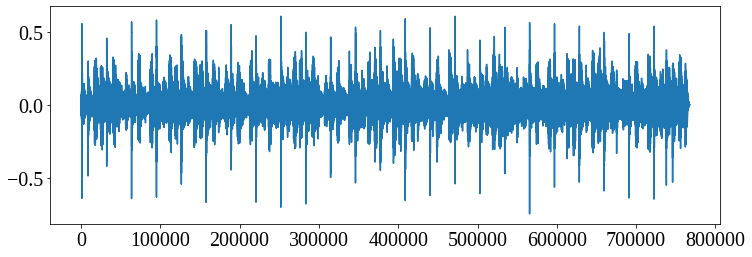

In [32]:
fig3 = plt.figure(figsize=[12,4])
plt.plot(m)